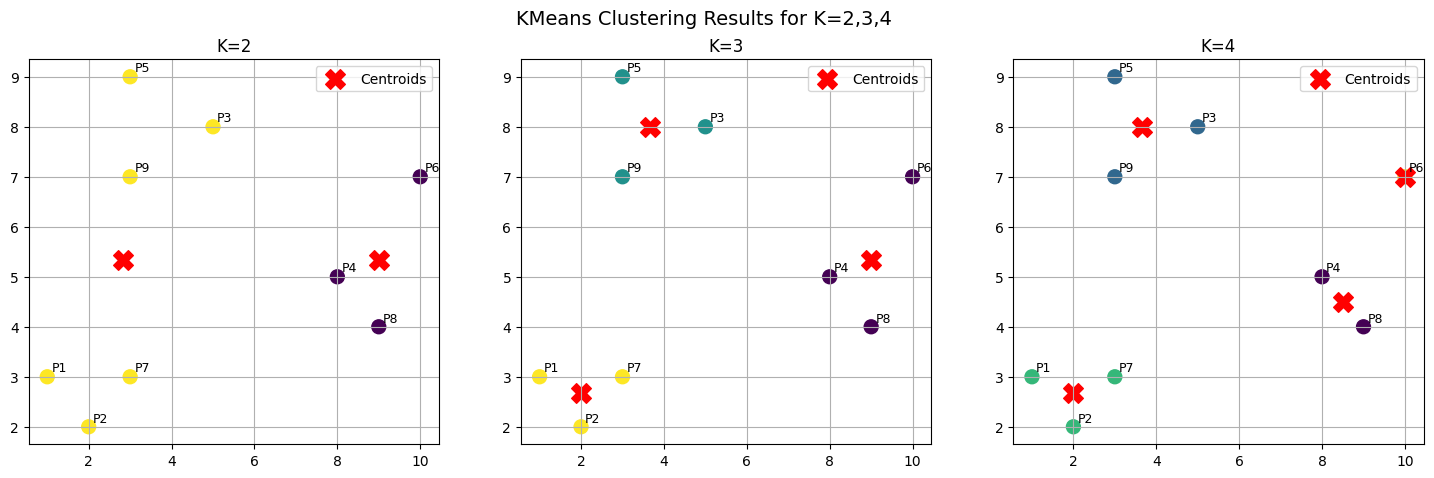


K=2
Cluster sizes: {np.int32(0): np.int64(3), np.int32(1): np.int64(6)}
Centroids:
 [[9.         5.33333333]
 [2.83333333 5.33333333]]

K=3
Cluster sizes: {np.int32(0): np.int64(3), np.int32(1): np.int64(3), np.int32(2): np.int64(3)}
Centroids:
 [[9.         5.33333333]
 [3.66666667 8.        ]
 [2.         2.66666667]]

K=4
Cluster sizes: {np.int32(0): np.int64(2), np.int32(1): np.int64(3), np.int32(2): np.int64(3), np.int32(3): np.int64(1)}
Centroids:
 [[ 8.5         4.5       ]
 [ 3.66666667  8.        ]
 [ 2.          2.66666667]
 [10.          7.        ]]


In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

# 1. Data points
points = {
    "P1": (1,3), "P2": (2,2), "P3": (5,8), "P4": (8,5), "P5": (3,9),
    "P6": (10,7), "P7": (3,3), "P8": (9,4), "P9": (3,7)
}
X = np.array(list(points.values()))

# 2. Run KMeans for K=2,3,4
Ks = [2,3,4]
fig, axes = plt.subplots(1, 3, figsize=(18,5))

for idx, k in enumerate(Ks):
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_

    # Plot clusters
    axes[idx].scatter(X[:,0], X[:,1], c=labels, cmap="viridis", s=100)
    axes[idx].scatter(centroids[:,0], centroids[:,1], 
                      c="red", marker="X", s=200, label="Centroids")

    # Label points
    for i, label in enumerate(points.keys()):
        axes[idx].text(X[i,0]+0.1, X[i,1]+0.1, label, fontsize=9)

    axes[idx].set_title(f"K={k}")
    axes[idx].legend()
    axes[idx].grid(True)

plt.suptitle("KMeans Clustering Results for K=2,3,4", fontsize=14)
plt.show()

# 3. Compare cluster sizes and centroids
for k in Ks:
    kmeans = KMeans(n_clusters=k, random_state=42).fit(X)
    labels = kmeans.labels_
    centroids = kmeans.cluster_centers_
    unique, counts = np.unique(labels, return_counts=True)
    print(f"\nK={k}")
    print("Cluster sizes:", dict(zip(unique, counts)))
    print("Centroids:\n", centroids)
